<a href="https://colab.research.google.com/github/Mahnoor123-Fatima/Street_Signs_Classifier/blob/main/Street_Signs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cloning into dataset repositry available on bitbucket
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
#how we unpickle data

In [ ]:
import pickle

In [ ]:
#opening pickle files and creating variables for testing, training and validation data
with open('/content/german-traffic-signs/train.p','rb') as f:    #rb means read binary format.
  train_data = pickle.load(f)                                    #f is pointer
with open('/content/german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)    
with open('/content/german-traffic-signs/valid.p','rb') as f:
  valid_data = pickle.load(f) 
                                                                 

In [ ]:
type(train_data)

dict

In [ ]:
#now we have to extract the dictionary and unpikle the data now this can be done as:
x_train,y_train = train_data['features'],train_data['labels']
x_test,y_test = test_data['features'],test_data['labels']
x_valid,y_valid = valid_data['features'],valid_data['labels']

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
x_test.shape

(12630, 32, 32, 3)

In [ ]:
x_valid.shape

(4410, 32, 32, 3)

In [ ]:
import pandas as pd

data = pd.read_csv('german-traffic-signs/signnames.csv')

print(data)

#from the dataframe printed below we come to know that the dataset has 43 classes.

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [ ]:
#for visualization of image import matplotlib
import matplotlib.pyplot as plt


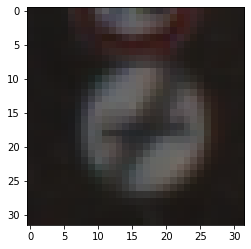

In [ ]:
# below code display an image from our dataset
plt.imshow(x_train[0])

In [ ]:
print(y_train[0])

41


In [ ]:
#preprocessing of image
import cv2

In [ ]:
#converting image into gray scale so that neural network can learn the pattern easily
def gray(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

def equalize(img):
  img = cv2.equalizeHist(img)
  return img
  #equalize histogram extract reigon of interest very correctly

def preprocess(img):
  img = gray(img)
  img = equalize(img)
  #normalizing of images
  img = img/255
  return img

In [ ]:
import numpy as np

In [ ]:
#using map fucntion to iterate through the whole dataset and apply our preprocessing fucntion to every image
x_train = np.array(list(map(preprocess, x_train )))
x_test = np.array(list(map(preprocess, x_test )))
x_valid = np.array(list(map(preprocess, x_valid )))

(34799, 32, 32)


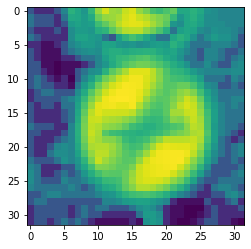

In [ ]:
#preprocessed image
plt.imshow(x_train[0])
print(x_train.shape)

In [ ]:
#converting the labels into categorical variables
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)

In [ ]:
#reshaping of images
x_train = x_train.reshape(34799, 32, 32 ,1)
x_test = x_test.reshape(12630, 32, 32 ,1)
x_valid = x_valid.reshape(4410, 32, 32 ,1)

In [ ]:
#importing keras and required layers for creation of model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
#create model
model = Sequential()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(43,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4335      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               270500    
_________________________________________________________________
dropout (Dropout)            (None, 500)              

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=400,verbose=1,shuffle=1)

Epoch 1/50
87/87 [==============================] - 1s 8ms/step - loss: 2.4795 - accuracy: 0.3433
Epoch 2/50
87/87 [==============================] - 1s 7ms/step - loss: 0.8524 - accuracy: 0.7383
Epoch 3/50
87/87 [==============================] - 1s 7ms/step - loss: 0.4845 - accuracy: 0.8535
Epoch 4/50
87/87 [==============================] - 1s 7ms/step - loss: 0.3291 - accuracy: 0.9018
Epoch 5/50
87/87 [==============================] - 1s 7ms/step - loss: 0.2453 - accuracy: 0.9271
Epoch 6/50
87/87 [==============================] - 1s 7ms/step - loss: 0.1909 - accuracy: 0.9436
Epoch 7/50
87/87 [==============================] - 1s 7ms/step - loss: 0.1559 - accuracy: 0.9538
Epoch 8/50
87/87 [==============================] - 1s 7ms/step - loss: 0.1306 - accuracy: 0.9619
Epoch 9/50
87/87 [==============================] - 1s 7ms/step - loss: 0.1090 - accuracy: 0.9684
Epoch 10/50
87/87 [==============================] - 1s 7ms/step - loss: 0.0902 - accuracy: 0.9736
Epoch 11/50
87/87 [

In [ ]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
predictions[0]

16

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

16

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_test[0]

16

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        60
           1       0.95      0.95      0.95       720
           2       0.92      0.98      0.95       750
           3       0.91      0.94      0.92       450
           4       0.95      0.93      0.94       660
           5       0.89      0.86      0.87       630
           6       1.00      0.70      0.82       150
           7       0.91      0.91      0.91       450
           8       0.90      0.92      0.91       450
           9       0.94      1.00      0.97       480
          10       0.99      0.99      0.99       660
          11       0.94      0.90      0.92       420
          12       0.95      0.98      0.97       690
          13       0.98      1.00      0.99       720
          14       0.98      0.98      0.98       270
          15       0.90      0.98      0.94       210
          16       0.97      0.99      0.98       150
          17       0.99    

In [ ]:
model.save('street_signs_classifier.h5')